In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [69]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [70]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [71]:
train_data.dropna(inplace=True) # remove rows with NaN values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [72]:
data = train_data.copy()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [73]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [74]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [75]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\hoang\AppData\Local\Temp\ipykernel_752\1990600865.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [76]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [77]:
data['journey_days'] = data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month
data['journey_year'] = data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_days,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-16 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-16 05:50:00,2023-03-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-16 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-16 18:05:00,2023-03-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-16 16:50:00,2023-03-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [78]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [79]:
def extrac_hour_minute(col):
    data[col + '_hour'] = data[col].dt.hour
    data[col + '_minute'] = data[col].dt.minute
    data.drop(col, axis=1, inplace=True)

In [80]:
extrac_hour_minute('Dep_Time')
extrac_hour_minute('Arrival_Time')
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_days,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


<AxesSubplot: >

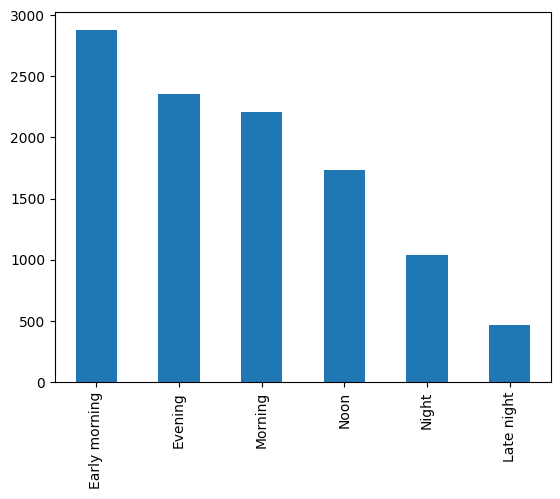

In [81]:
def dep_time_transfer(x):
    if x>4 and x <= 8:
        return 'Early morning'
    elif x>8 and x <= 12:
        return 'Morning'
    elif x>12 and x <= 16:
        return 'Noon'
    elif x>16 and x <= 20:
        return 'Evening'
    elif x>20 and x <=24:
        return 'Night'
    else:
        return 'Late night'

data['Dep_Time_hour'].apply(dep_time_transfer).value_counts().plot(kind='bar')

In [82]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()

data['Dep_Time_hour'].apply(dep_time_transfer).value_counts().iplot(kind='bar')

In [83]:
def preprocess_duration(duration):
    if 'h' not in duration:
        duration = '0h ' + duration
    elif 'm' not in duration:
        duration = duration + ' 0m'
    return duration

data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [84]:


data['Duration_hour'] = data['Duration'].apply(lambda x:int( x.split(' ')[0][0:-1]))
data['Duration_minute'] = data['Duration'].apply(lambda x:int( x.split(' ')[1][0:-1]))
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_days,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [85]:
data['Total_duration_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
# data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]) * 60 + int(x.split(' ')[1][0:-1]) *1 )
# eval('2*3+23') will give 2*3+23

data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_days,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Total_duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


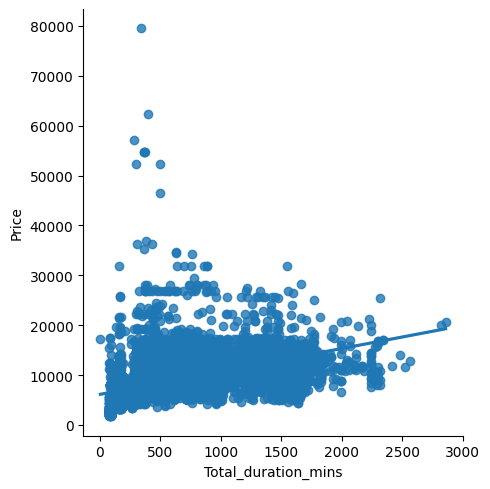

In [86]:
sns.lmplot(x = 'Total_duration_mins', y = 'Price', data = data)

In [87]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot: ylabel='Destination'>

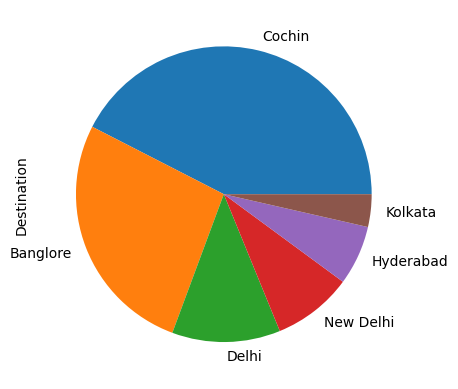

In [88]:
data['Destination'].value_counts().plot(kind='pie')

In [89]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

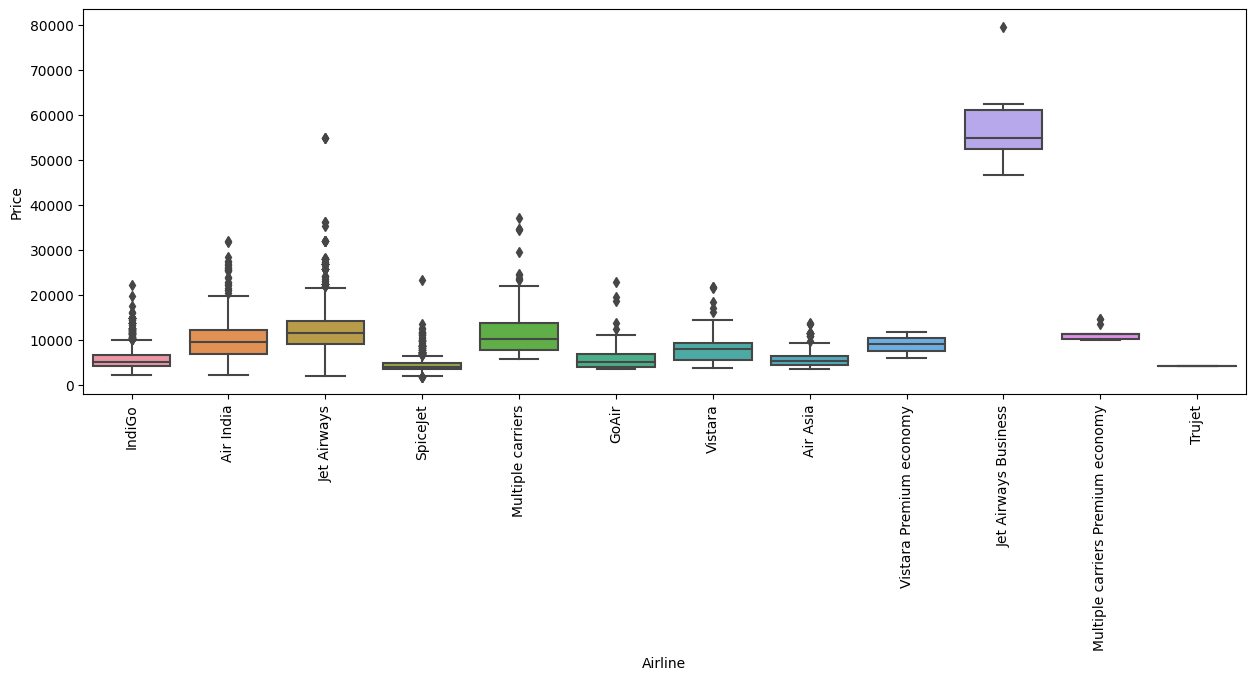

In [90]:
plt.figure(figsize=(15, 5))
sns.boxplot(y = 'Price', x = 'Airline', data= data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

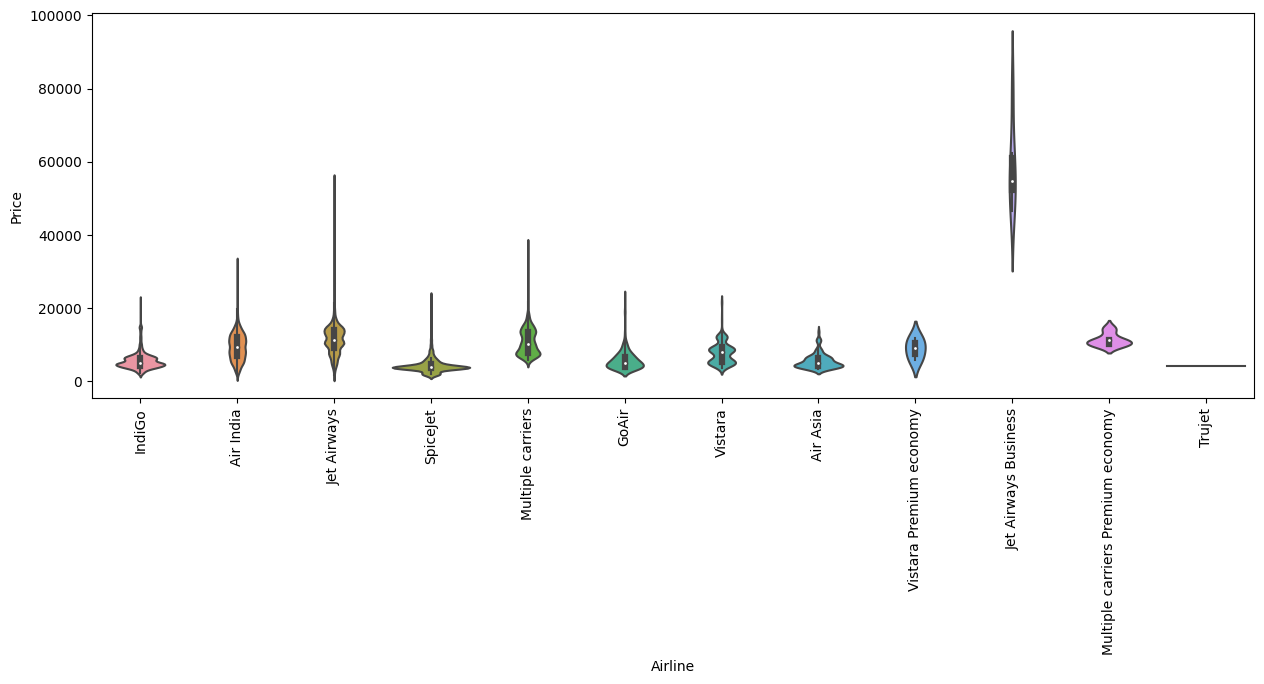

In [91]:
plt.figure(figsize=(15, 5))
sns.violinplot(y = 'Price', x = 'Airline', data= data)
plt.xticks(rotation = 'vertical')


In [92]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [93]:
data.drop(columns= ['Additional_Info', 'Route', 'Total_duration_mins', 'journey_year'], axis=1, inplace=True)

In [94]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [95]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
int_col = [col for col in data.columns if data[col].dtype != 'object']

In [96]:
for category in data['Source'].unique():
    data['Source' + category] = data['Source'].apply(lambda x: 1 if x==category else 0)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [97]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines 

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [98]:
dict1 = {key:index for index, key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [99]:
data['Airline'] = data['Airline'].map(dict1)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [100]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index 
dict2 = {key:index for index, key in enumerate(dest,0)}
data['Destination'] = data['Destination'].map(dict2)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [101]:

stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops']  = data['Total_Stops'].map(stops)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [102]:
def plot(df, col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.kdeplot(df[col], ax =ax1)
    sns.boxplot(df[col], ax =ax2)
    sns.displot(df[col], ax =ax3)

C:\Users\hoang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.



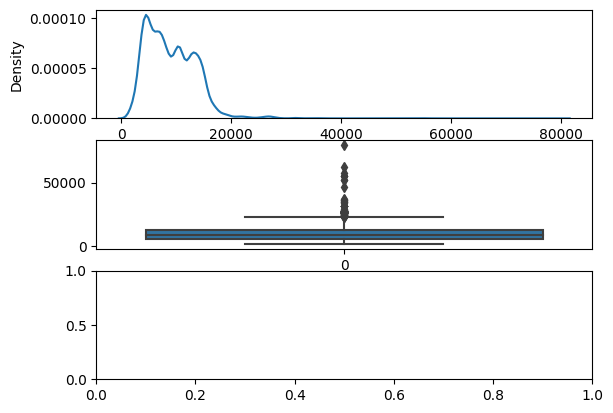

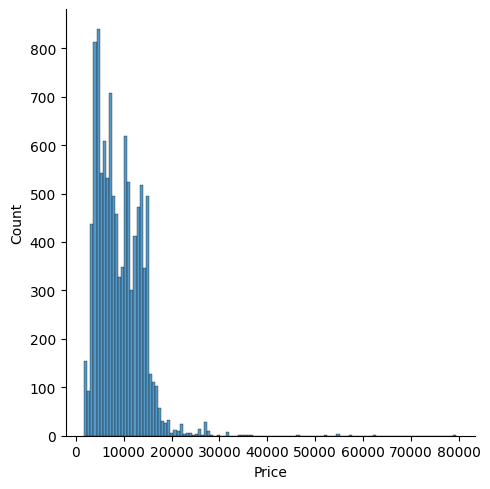

In [103]:
plot(data, 'Price')

In [104]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'])

C:\Users\hoang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.



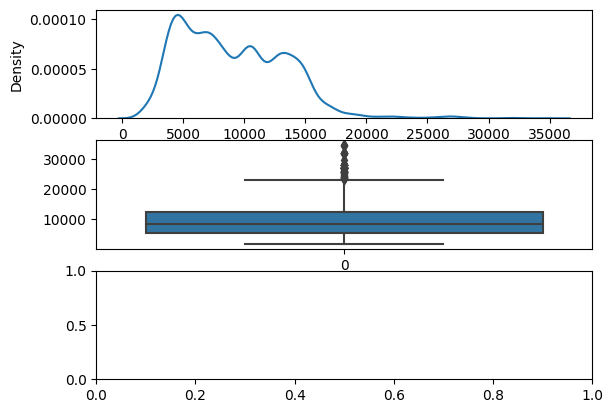

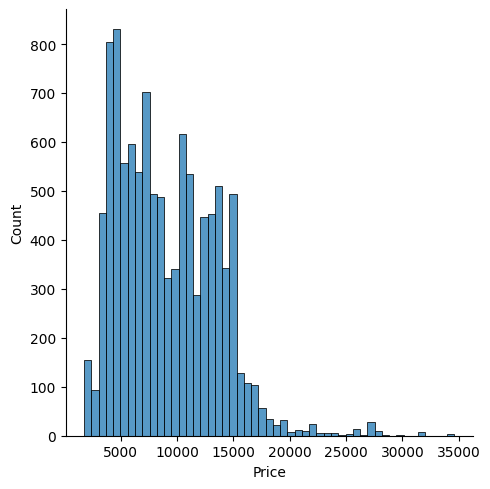

In [105]:
plot(data, 'Price')

In [106]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_days,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [107]:
data.drop(columns=  ['Source', 'Duration'], axis=1, inplace= True)

In [108]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_days             int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hour            int64
Duration_minute          int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object

In [109]:
from sklearn.feature_selection import mutual_info_regression
X = data.drop(['Price'], axis = 1)
y = data['Price']

In [110]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_days           int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hour          int64
Duration_minute        int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [111]:
mutual_info_regression(X,y)

array([0.98149119, 1.00134342, 0.78114729, 0.19049379, 0.24240759,
       0.33496637, 0.26117206, 0.3948168 , 0.35795412, 0.4693239 ,
       0.33721714, 0.38394968, 0.45966105, 0.52527714, 0.13249554,
       0.19621446])

In [112]:
imp = pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
imp.columns = ['Important']
imp.sort_values(by='Important', ascending=False, inplace=True)
imp 

,Important
Destination,0.996966
Airline,0.979972
Total_Stops,0.795065
SourceDelhi,0.526119
Duration_hour,0.474552
SourceKolkata,0.453360
Arrival_Time_hour,0.406084
SourceBanglore,0.382531
Arrival_Time_minute,0.349180
Dep_Time_hour,0.347925


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
ml_model = RandomForestRegressor()
model = ml_model.fit(X_train, y_train)

In [117]:
y_predict = model.predict(X_test)

In [118]:
import pickle 

In [119]:
open('rf_random.pkl', 'wb').write(pickle.dumps(model))

43370197

In [120]:
model = open('rf_random.pkl', 'rb')

In [121]:
forest = pickle.load(model)

In [122]:
forest.predict(X_test)

array([16735.  ,  6219.45,  8826.05, ...,  3519.48,  6353.68,  7033.99])

In [123]:
def mape(y_true, y_pred):
    np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [124]:
mape(y_test, forest.predict(X_test))

0.13208724800348337

In [125]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Trainning_score: {}'.format(model.score(X_train, y_train)))
    prediction = model.predict(X_test)
    print('Pridictions are :{}\n'.format(prediction))

    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, prediction)
    print('R2_score:{}'.format(r2_score))
    print('MSE :{}'.format(metrics.mean_squared_error(y_test, prediction)))
    print('MAE :{}'.format(metrics.mean_absolute_error(y_test, prediction)))
    print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
    print('MAPE :{}'.format(mape(y_test, prediction)))

    sns.distplot(y_test - y_predict)

Trainning_score: 0.9517843926769615
Pridictions are :[16745.99  6447.99  8820.82 ...  3528.39  6442.05  7059.79]

R2_score:0.8107828544645288
MSE :3683603.639119984
MAE :1179.8895354062927
RMSE :1919.271642868717
MAPE :0.13260131741598916


C:\Users\hoang\AppData\Local\Temp\ipykernel_752\1297615728.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




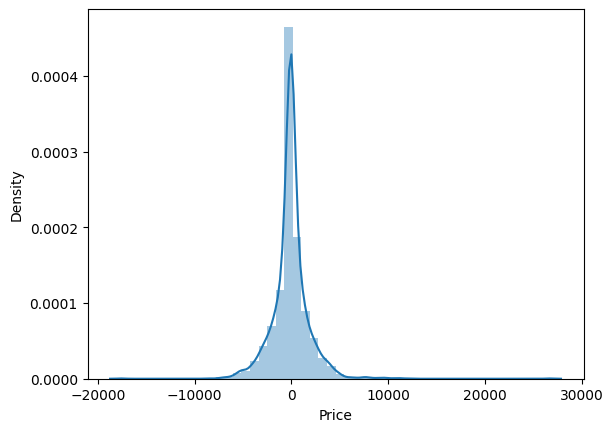

In [126]:
predict(RandomForestRegressor())

In [127]:
from sklearn.model_selection import RandomizedSearchCV


In [129]:
reg_rf = RandomForestRegressor()

In [133]:
n_estimators = [int (x) for x in np.linspace(start = 1000, stop = 1200, num=6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=4)] 
min_samples_split = [5,10,15,20]

In [134]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [135]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 20]}

In [136]:
rf_random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose = 2, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hoang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 21}

In [140]:
pred_2 = rf_random.predict(X_test)

In [141]:
from sklearn import metrics
metrics.r2_score(y_test, pred_2)

0.81901166540188